# PHYS 325 Scientific Computing -- Fall 2018

### Announcements

- no labs this week => Software Carpentry Workshop on Friday
- exams:
    - Thursday, September 27, 10:30am, instead of lecture
    - Thursday, October 25, 10:30am, instead of lecture (planned)
    - Thursday, November 29, 10:30am, instead of lecture (planned)
- final project presentation: Thursday, December 13, 9:30-11:30 (finals slot)

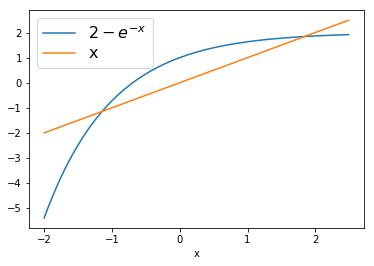

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2.0, 2.5, 0.01)

plt.plot(x, 2 - np.exp(-x), label=r'$2-e^{-x}$')
plt.plot(x, x, label='x')
plt.xlabel("x")
plt.legend(loc='upper left', fontsize=16, labelspacing=0.3)

plt.show()

In [36]:
from numpy import exp, sign

def f(x):
    return 2 - exp(-x) - x

a = -2
b = 0
counter = 0
accuracy = 1e-10

if( sign(f(a)) != sign(f(b)) ):
    while(abs(a-b) > accuracy):
        counter += 1
        midpoint = (a+b)/2
        if( sign(f(midpoint)) == sign(f(a)) ):
            a = midpoint
        else:
            b = midpoint
            
print("Bisection converged to ", (a+b)/2, " after ", counter, " iterations")

Bisection converged to  -1.146193220600253  after  35  iterations


### Newton's method

(also called Newton-Raphson method)

![Newton's method](images/newton.png)

**Idea**: Taylor expansion around the root

$$f(x+\delta) = 0 = f(x) + f'(x)\delta + \mathcal{O}(\delta^2)$$

For small $\delta$:

$$\delta\approx-\frac{f(x)}{f'(x)}$$

- faster than relaxation and bisection methods
- can be generalized to many variables
- usually finds root nearest to starting point (great method to refine roots)
<br><br>
- need to know the function's derivative
- numerical derivatives possible, but reduce efficiency and may lead to roundoff errors
<br><br>
- problems near extrema (derivative zero)
- might enter an infinite cycle
- poor global convergence, but can be combined with bisection

In [1]:
from numpy import exp, sign

def f(x):
    return 2 - exp(-x) - x

def deriv(x):
    return exp(-x) - 1

x = -2
compare_x = 1000
counter = 0
accuracy = 1e-10

while(abs(x-compare_x) > accuracy):
    counter += 1
    compare_x = x
    x = x - f(x)/deriv(x)
            
print("Newton's method converged to ", x, " after ", counter, " iterations")

Newton's method converged to  -1.1461932206205825  after  6  iterations


Newton's method converges *quadratically* rather than linearly:

$$
\begin{array}{lll}
f(x^*) = & 0 &= f(x_n) + (x^*-x_n)f'(x_n) +(x^*-x_n)^2 \frac{f''(x_n)}{2} + \ldots\\
\Rightarrow & 0 &= \frac{f(x_n)}{f'(x_n)}+ (x^*-x_n)+\frac{1}{2}(x^*-x_n)^2 \frac{f''(x_n)}{f'(x_n)}
\end{array}
$$

With the Newton formula

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

we get

$$
0 = \underbrace{(x^*-x_{n+1})}_{-\varepsilon_{n+1}} \ +\frac{1}{2}\ \underbrace{(x^*-x_n)^2}_{\varepsilon_n^2}\ \frac{f''(x_n)}{f'(x_n)}
$$

$$
\Rightarrow \varepsilon_{n+1} \propto \varepsilon_n^2
$$

Near a root, the number of significant digits approximately **doubles**

More methods (explained nicely in "Numerical Recipes"):

- [secant method](https://en.wikipedia.org/wiki/Secant_method): like Newton's method but with differences instead of derivatives
- [Broyden's method](https://en.wikipedia.org/wiki/Broyden%27s_method): generalization of the secant method to more than one dimension
- [false position (or regula falsi)](https://en.wikipedia.org/wiki/False_position_method): combination of bisection and secant method
- [Ridder's method](https://en.wikipedia.org/wiki/Ridders%27_method): powerful variant of false position
- [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method): combination of the bisection method, the secant method and inverse quadratic interpolation
- [Laguerre's method](https://en.wikipedia.org/wiki/Laguerre%27s_method): taylored to polynomials

Which method to choose? (according to "Numerical Recipes")

- When you cannot easily compute the derivative:
     - Brent's algorithm: method of choice to find a bracketed root of a general 1d function
     - Ridder's method is a close competitor
- When you can compute the derivative: 
     - after bracketing, combine Newton's method with bisection or similar
- Roots of polynomials:
     - beware that some polynomials are ill-conditioned! (small coefficient changes => large effects)
     - Laguerre's method is recommended as a starting point
- Multidimensional problems: 
     - the only elementary method is Newton, which works very well if you can supply a good first guess of the solution 
     - if Newton's method fails: there are more advanced and complicated, but globally more convergent, alternatives
     - more dimensions are harder because we cannot "trap" the solution (it can escape via other dimensions)

Example in 2d: $f(x,y) = g(x,y) = 0$

![Nonlinear multidimensional systems](images/nonlinear_multidim_color.png)

Image adapted from *"Numerical Recipes in C"*

If the two functions $f$ and $g$ are unrelated to each other, so are their "contour lines" $f=0$ and $g=0$

=> we need to map out the full zero contour lines in order to find all common roots

This becomes much harder the more dimensions we have!

### Newton's method for more than one variable

Several equations for several variables:

$$
\left.\begin{array}{lll}
f_1(x_1,\ldots x_N) &=& 0\\
 & \vdots & \\
f_N(x_1,\ldots x_N) &=& 0
\end{array}\right\}
\mathbf{f}(\mathbf{x}) = 0
$$

Taylor expand around root $\mathbf{x}^*\equiv (x^*_1,\ldots,x^*_N)$:

$$
0 = \mathbf{f}(\mathbf{x}^*) = \mathbf{f}(\mathbf{x}) + \nabla\mathbf{f}\cdot(\mathbf{x}^*-\mathbf{x})+\ldots,
$$

where

$$
\nabla\mathbf{f} = \begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \ldots & \frac{\partial f_1}{\partial x_N}\\
\vdots & & \vdots \\
\frac{\partial f_N}{\partial x_1} & \ldots & \frac{\partial f_N}{\partial x_N}
\end{pmatrix}
$$

This is also called the [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) (in this case evaluated at $\mathbf{x}^*$)

This is just a set of linear equations for $\Delta\mathbf{x}\equiv \mathbf{x}-\mathbf{x}^*$:

$$
\nabla\mathbf{f}\cdot\Delta\mathbf{x} = \mathbf{f}(\mathbf{x})
$$

Algorithm:
- choose starting point vector $\mathbf{x}$
- calculate $\mathbf{f}$ and $\nabla\mathbf{f}$ at this vector
- solve linear system (see previous lectures) for $\Delta\mathbf{x}$
- update vector $\mathbf{x}'=\mathbf{x}-\Delta\mathbf{x}$
- repeat until desired accuracy

### SciPy [optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) library

In [3]:
import scipy as sp
import scipy.optimize as opt

def f(x):
    return 2 - sp.exp(-x) - x

f0 = opt.bisect(f, -2, 0)           # starting interval [-2,0]
f1 = opt.newton(f, -2)              # starting point -2

print(f0)
print(f1)

-1.1461932206202619
-1.1461932206205825


In [4]:
f0 = opt.bisect(f, -2, 2)           # must bracket root for bisection

ValueError: f(a) and f(b) must have different signs

In [7]:
import numpy as np
from scipy.optimize import root

def f(x):
    fun = [ x[0] * np.cos(x[1]) -4, x[0] * x[1] - x[1] - 5]
    return fun

x0 = np.array([1.,1.])

res = root(f, x0, method='broyden1')    # Broyden method in 2d
print(res)

     fun: array([ 1.14247340e-06, -5.14612966e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 121
  status: 1
 success: True
       x: array([6.50409756, 0.90841404])


### Function optimization

(finding the minimum/maximum of a function)

In physics we often need minimization, for instance:

- equilibrium problems (potential energy minimum)
- quantum mechanical ground state (energy minimum)
- minimization of the action, Fermat's principle
- data fitting (linear least-squares)

Minima | $\leftrightarrow$ | Maxima
-------|-------------------|----------
$f(x)$ | $\leftrightarrow$ | $-f(x)$

Relation to root finding:

$$
\frac{df}{dx} = 0
$$

But minimization problems are in general simpler:

- might need the minimum of $f(x_1,\ldots,x_N)$ with respect to several variables
- but no analog to simultaneous equations in many variables

There can be many maxima and minima:

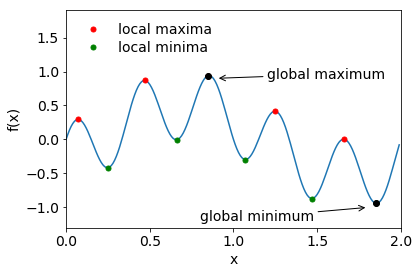

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def f(x):
    return np.cos(2*np.pi*(x+0.1))*np.sin(3*np.pi*x)

x = np.arange(0.0, 2.0, 0.01)
y = f(x)

localMaxima = argrelextrema(y, np.greater)[0]
localMinima = argrelextrema(y, np.less)[0]

plt.rcParams.update({'font.size': 14})

plt.plot(x, y)
plt.plot(x[localMaxima], f(x[localMaxima]), 'r.', markersize=10, label='local maxima')
plt.plot(x[localMinima], f(x[localMinima]), 'g.', markersize=10, label='local minima')
plt.plot(x[localMaxima[2]], f(x[localMaxima[2]]), 'k.', markersize=12)
plt.plot(x[localMinima[4]], f(x[localMinima[4]]), 'k.', markersize=12)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc='upper left', frameon=False, labelspacing=0.3)

plt.annotate('global maximum', xy=(0.9, 0.9), xytext=(1.2, 0.9),
             arrowprops=dict(arrowstyle="->"),
             )

plt.annotate('global minimum', xy=(1.8, -1.0), xytext=(0.8, -1.2),
             arrowprops=dict(arrowstyle="->"),
             )

plt.xlim(0, 2)
plt.ylim(-1.3, 1.9)
plt.show()

- there may be several global maxima/minima (but usually just one)
- often interested in global minimum, e.g. ground state
- local minima also interesting, e.g. metastable equilibrium
- most methods are good at finding extrema, but cannot distinguish between local and global ones